<a href="https://colab.research.google.com/github/01star01ek/01star01ek/blob/main/latent%EA%B9%94%EB%81%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# SimSwap Face Swap - 완성 코드 (한번에 실행)

import os, shutil

# 설치
print("🔧 설치 중...")
if os.path.exists('/content/SimSwap'):
    shutil.rmtree('/content/SimSwap')

%cd /content
!git clone -q https://github.com/woctezuma/SimSwap.git SimSwap
%cd SimSwap
!git checkout -q upgrade-insightface

# NumPy 버전 고정하여 설치
!pip install --force-reinstall "numpy<2.0"


🔧 설치 중...
/content
/content/SimSwap
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 321.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 63.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [3]:
import os, shutil
!pip install -q torch==2.0.1 torchvision==0.15.2 --index-url https://download.pytorch.org/whl/cu118
!pip install -q insightface==0.7.3 onnxruntime moviepy opencv-python imageio==2.34.0

# 모델 다운로드
print("📥 모델 다운로드...")
!mkdir -p arcface_model parsing_model/checkpoint checkpoints insightface_func/models
!wget -q https://github.com/woctezuma/SimSwap-colab/releases/download/1.0/arcface_checkpoint.tar -O arcface_model/arcface_checkpoint.tar
!wget -q https://github.com/neuralchen/SimSwap/releases/download/1.0/checkpoints.zip -O checkpoints.zip
!wget -q https://github.com/neuralchen/SimSwap/releases/download/1.0/79999_iter.pth -O parsing_model/checkpoint/79999_iter.pth
!wget -q https://github.com/woctezuma/SimSwap-colab/releases/download/antelope/antelope.zip -O antelope.zip
!wget -q https://github.com/neuralchen/SimSwap/releases/download/512_beta/512.zip -O 512.zip
!unzip -q checkpoints.zip -d checkpoints && unzip -q 512.zip -d checkpoints && unzip -q antelope.zip -d insightface_func/models/

# PyTorch 호환성 수정
print("🔧 PyTorch 호환성 수정...")
!cp models/fs_model.py models/fs_model.py.backup
!sed -i 's/torch.load(netArc_checkpoint, map_location=torch.device("cpu"))/torch.load(netArc_checkpoint, map_location=torch.device("cpu"), weights_only=False)/g' models/fs_model.py

# det_size 초기 설정
!sed -i 's/det_size=(640,640)/det_size=(320,320)/g' test_wholeimage_swapsingle.py


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchaudio 2.6.0+cu124 requires torch==2.6.0, but you have torch 2.0.1+cu118 which is incompatible.
📥 모델 다운로드...
🔧 PyTorch 호환성 수정...


📁 소스 이미지 (바꿀 얼굴) 업로드:


Saving source.png to source (1).png
📁 타겟 이미지 (원본) 업로드:


Saving target.png to target (1).png
/content/SimSwap
✅ 스크립트 설정 수정 완료
------------ Options -------------
Arc_path: arcface_model/arcface_checkpoint.tar
aspect_ratio: 1.0
batchSize: 8
checkpoints_dir: ./checkpoints
cluster_path: features_clustered_010.npy
crop_size: 224
data_type: 32
dataroot: ./datasets/cityscapes/
display_winsize: 512
engine: None
export_onnx: None
feat_num: 3
fineSize: 512
fp16: False
gpu_ids: [0]
how_many: 50
id_thres: 0.03
image_size: 224
input_nc: 3
instance_feat: False
isTrain: False
label_feat: False
label_nc: 0
latent_size: 512
loadSize: 1024
load_features: False
local_rank: 0
max_dataset_size: inf
multisepcific_dir: ./demo_file/multispecific
nThreads: 2
n_blocks_global: 6
n_blocks_local: 3
n_clusters: 10
n_downsample_E: 4
n_downsample_global: 3
n_local_enhancers: 1
name: people
nef: 16
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
no_instance: False
no_simswaplogo: True
norm: batch
norm_G: spectralspadesyncbatch3x3
ntest: inf
onnx: None
output_nc: 3
o

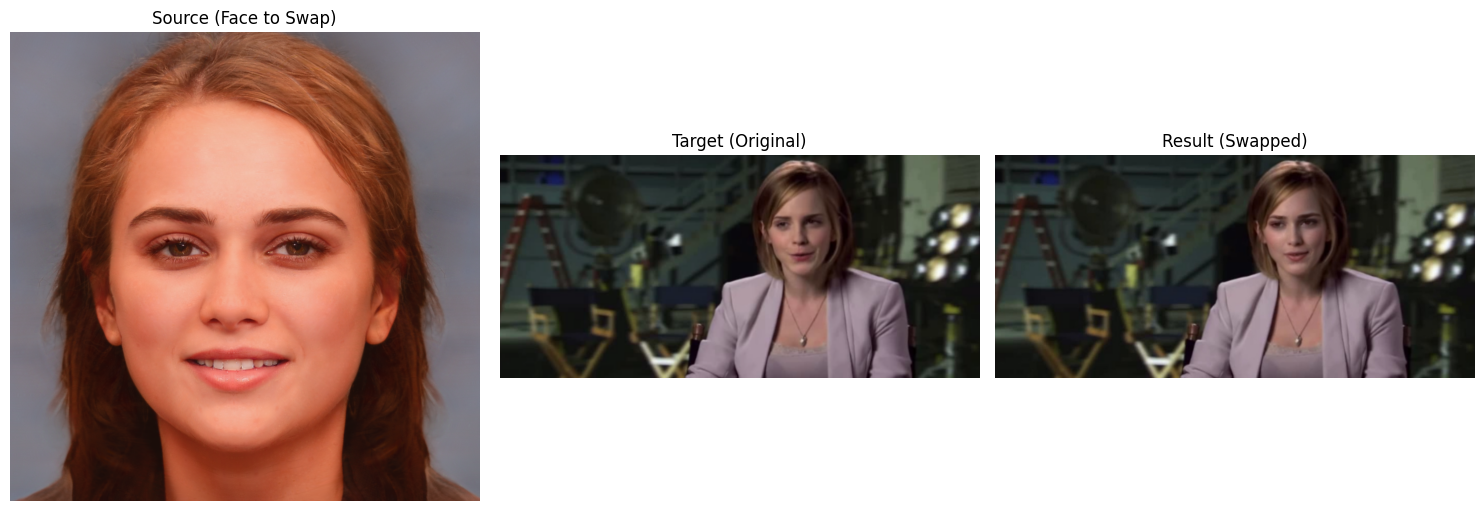

🎉 Face Swap 완료! 파일: result_whole_swapsingle.jpg


In [5]:

# 이미지 업로드
from google.colab import files
import cv2, matplotlib.pyplot as plt

print("📁 소스 이미지 (바꿀 얼굴) 업로드:")
source_uploaded = files.upload()
!cp /content/source.jpg /content/SimSwap/source.jpg

print("📁 타겟 이미지 (원본) 업로드:")
target_uploaded = files.upload()
!cp /content/target.jpg /content/SimSwap/target.jpg

%cd /content/SimSwap/

# 얼굴 탐지 임계값 조정
with open('test_wholeimage_swapsingle.py', 'r') as f:
    content = f.read()

lines = content.split('\n')
new_lines = []

for line in lines:
    new_lines.append(line)
    if 'app.prepare(' in line:
        new_lines.append('    # 탐지 임계값 조정')
        new_lines.append('    if hasattr(app.models, "detection"):')
        new_lines.append('        app.models["detection"].nms_thresh = 0.3')
        new_lines.append('        app.models["detection"].det_thresh = 0.3')

with open('test_wholeimage_swapsingle.py', 'w') as f:
    f.write('\n'.join(new_lines))

print("✅ 스크립트 설정 수정 완료")

# Face Swap 실행
!python test_wholeimage_swapsingle.py \
    --crop_size 224 \
    --use_mask \
    --no_simswaplogo \
    --name people \
    --pic_a_path source.jpg \
    --pic_b_path target.jpg \
    --pic_specific_path target.jpg \
    --output_path ./output/

# 결과 확인
import os
import matplotlib.pyplot as plt

output_files = [f for f in os.listdir('./output/') if f.endswith(('.jpg', '.png'))]
print(f"생성된 파일: {output_files}")

if output_files:
    result_img = cv2.imread(f'./output/{output_files[0]}')
    result_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(cv2.imread('source.jpg'), cv2.COLOR_BGR2RGB))
    plt.title('Source (Face to Swap)')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(cv2.imread('target.jpg'), cv2.COLOR_BGR2RGB))
    plt.title('Target (Original)')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(result_rgb)
    plt.title('Result (Swapped)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    print(f"🎉 Face Swap 완료! 파일: {output_files[0]}")
else:
    print("❌ 결과 파일이 생성되지 않았습니다.")